In [1]:
import pandas as pd

In [2]:

pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('Train_Data.csv')

# Techniques perfomed

1.EDA

2.Feature Engineering

3.Feature Selection

4.Model Building 



In [4]:
import seaborn as sns

In [5]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [7]:
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452


# EDA 

In [8]:
df['sex'].value_counts()

male      2029
female    1601
Name: sex, dtype: int64

In [9]:
df['region'].value_counts()

southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64

<AxesSubplot:ylabel='Frequency'>

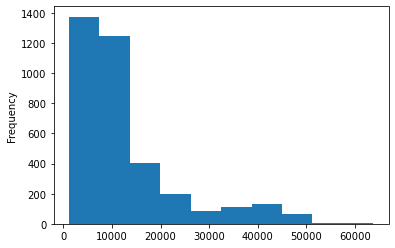

In [10]:
df['charges'].plot(kind='hist')

In [11]:
df['children'].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

In [12]:
categorical_features = [features for features in df.columns if df[features].dtype=='O']

In [13]:
categorical_features

['sex', 'smoker', 'region']

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

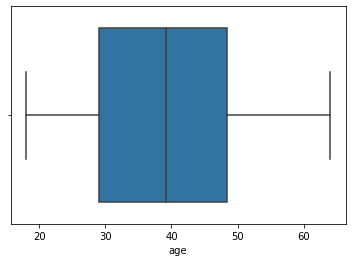

In [14]:
sns.boxplot(df['age'])

<AxesSubplot:ylabel='Density'>

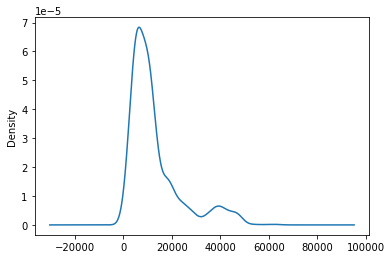

In [15]:
df['charges'].plot(kind='kde')

In [16]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

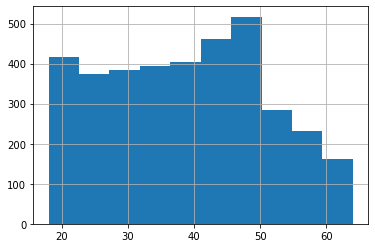

In [17]:
df['age'].hist()

In [18]:
df2 = df[df['age']> 25]

<AxesSubplot:ylabel='Frequency'>

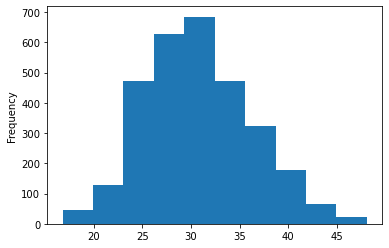

In [19]:
df2['bmi'].plot(kind='hist')

In [20]:
df2['bmi'].mean()

30.776584464600617

In [21]:
df.head(5)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

# In Data Analysis What All Things We Do

1.Missing Values

2.Explore About the Numerical Variables

3.Explore About categorical Variables

4.Finding Relationship between features



In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [28]:


import missingno



<AxesSubplot:>

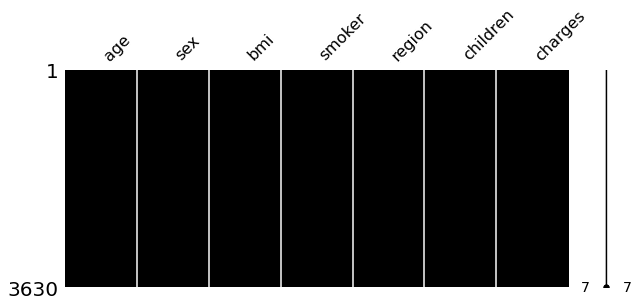

In [29]:
import missingno as mn
mn.matrix(df,color=(0,0,0),figsize = (10,4))

# No Missing values found in our dataset

<AxesSubplot:>

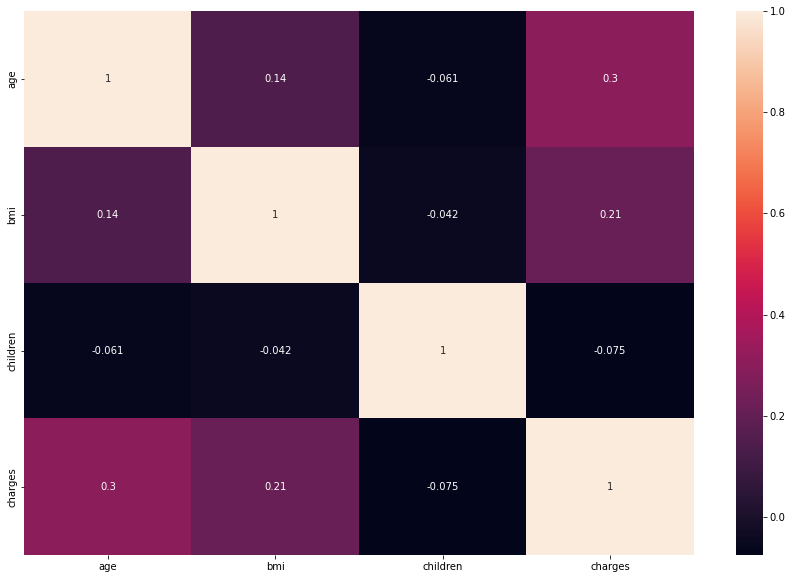

In [32]:


plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)



Series([], dtype: float64)

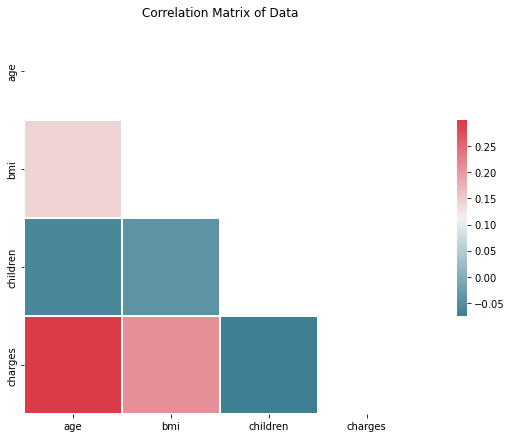

In [58]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])
correlation_matrix(df, threshold = 0.7)



# Age and charges are negatively correleted so as age increases charges increases is evident

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Univariate and Bivariate Analyses

In [40]:


# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal').set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange').set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

# Outlier Analysis

# Lets analyze each and every numerical columns' distribution when and / not when outliers are removed

Age column --------------------------------------------------------------------------------
no of records with outliers values: 0


,age,sex,bmi,smoker,region,children,charges


EDA for Age column --------------------------------------------------------------------------------


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


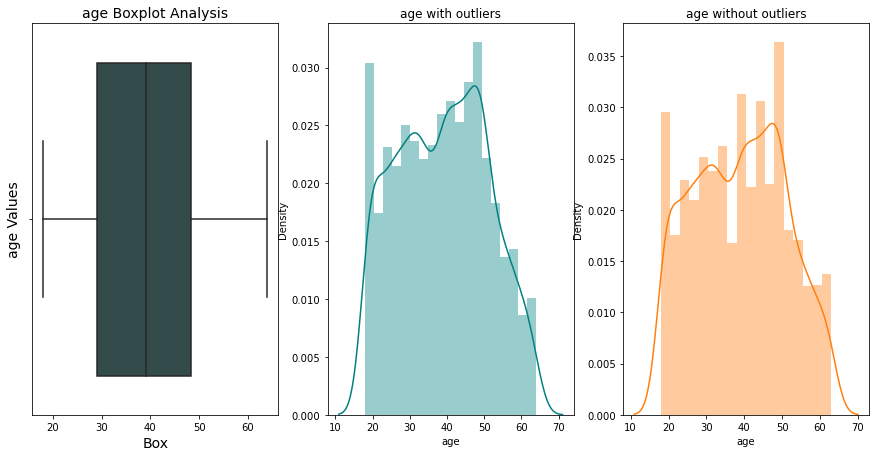

Bmi column --------------------------------------------------------------------------------
no of records with outliers values: 27


,age,sex,bmi,smoker,region,children,charges
41,47.0,female,46.986496,no,southeast,1,8083.178229
279,46.0,female,48.070000,no,northeast,2,9432.925300
316,22.0,male,52.580000,yes,southeast,1,44501.398200
448,47.0,female,45.320000,no,southeast,1,8569.861800
539,25.0,male,45.540000,yes,southeast,2,42112.235600


EDA for Bmi column --------------------------------------------------------------------------------


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


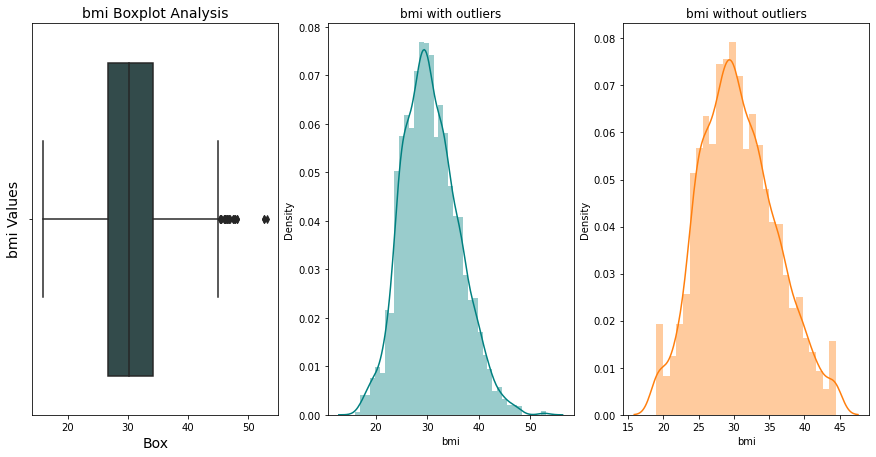

Children column --------------------------------------------------------------------------------
no of records with outliers values: 0


,age,sex,bmi,smoker,region,children,charges


EDA for Children column --------------------------------------------------------------------------------


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


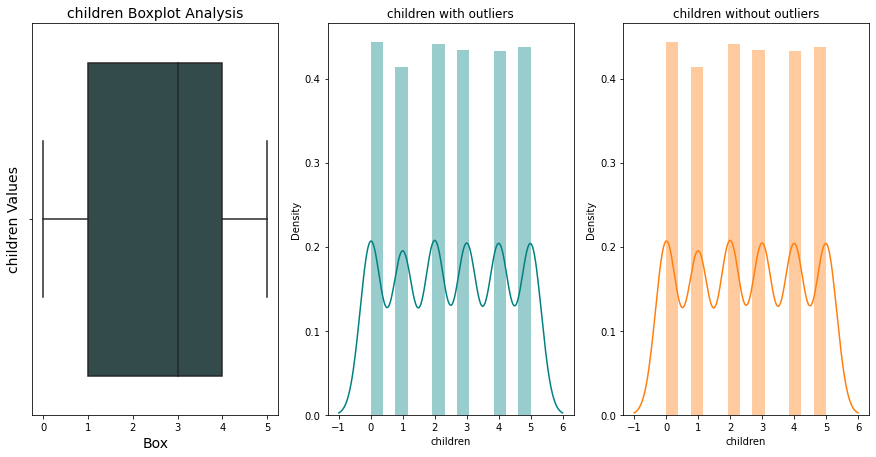

Charges column --------------------------------------------------------------------------------
no of records with outliers values: 362


,age,sex,bmi,smoker,region,children,charges
10,35.694607,male,33.577128,yes,southwest,2,38433.524296
15,46.697739,male,33.554859,yes,northeast,1,41501.655546
17,47.000000,male,36.080000,yes,southeast,1,42211.138200
24,63.000000,female,32.200000,yes,southwest,2,47305.305000
26,34.038848,male,30.558462,no,northeast,4,29101.752736


EDA for Charges column --------------------------------------------------------------------------------


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


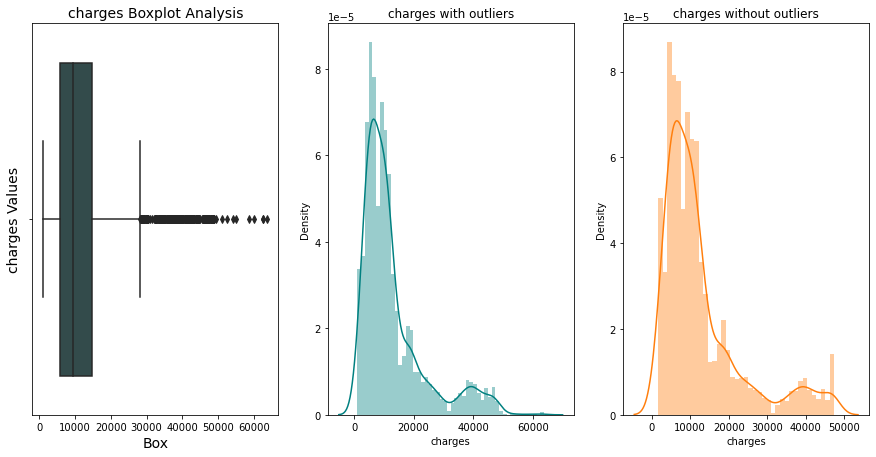

In [41]:


# Outlier, distribution for columns with outliers
boxplotcolumns = ['age', 'bmi', 'children', 'charges']
for cols in boxplotcolumns:
    Q3 = df[cols].quantile(0.75)
    Q1 = df[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    count = len(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))])
    print(f'no of records with outliers values: {count}')
    
    display(df.loc[(df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))].head())
    print(f'EDA for {cols.capitalize()} column', '--'*40)
    odp_plots(df, cols)

del cols, IQR, boxplotcolumns



<AxesSubplot:>

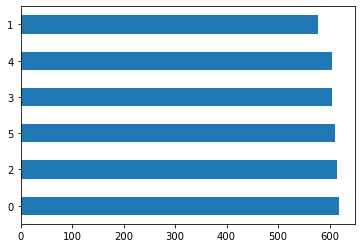

In [46]:
df['children'].value_counts().sort_values(ascending=False).plot(kind='barh')

In [47]:
df['children'].value_counts().sort_values(ascending=False)

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

# There are more people with no children in our dataset 

In [48]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


<AxesSubplot:ylabel='smoker'>

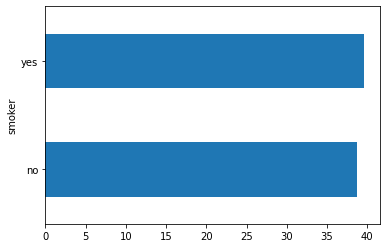

In [52]:
df.groupby('smoker')['age'].mean().plot(kind='barh')

# Avg smokers is our dataset is 39 whereas it is the same case with non smokers 

In [53]:
df.groupby('region')['age'].size()



region
northeast     848
northwest     911
southeast    1021
southwest     850
Name: age, dtype: int64

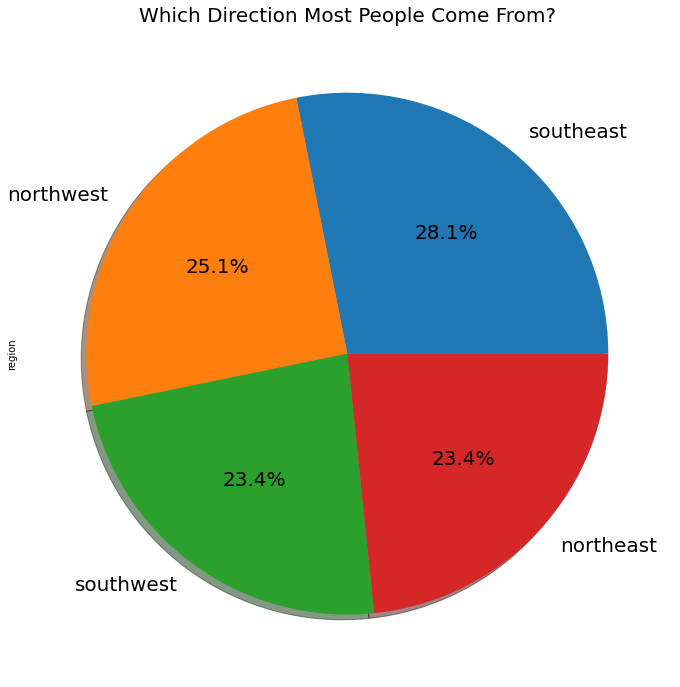

In [55]:
df["region"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    fontsize=20,
    figsize=(12,12),
    shadow=True
    
)
plt.title('Which direction most people come from?'.title() , fontsize=20);

# Most people in our dataset are from southeast direction followed by northwest. Southwest and northeast are of same proportion

In [60]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [69]:
smoker_charges =df.groupby('smoker')['charges'].mean().index

In [70]:
smoker_values=df.groupby('smoker')['charges'].mean().values

([<matplotlib.patches.Wedge at 0x7f0b56288b70>,
 [Text(0.843508863682542, 0.706040223279798, 'no'),
  Text(-0.8435088306304129, -0.7060402627672967, 'yes')],
 [Text(0.46009574382684104, 0.38511284906170795, '22.18%'),
  Text(-0.460095725798407, -0.38511287060034366, '77.82%')])

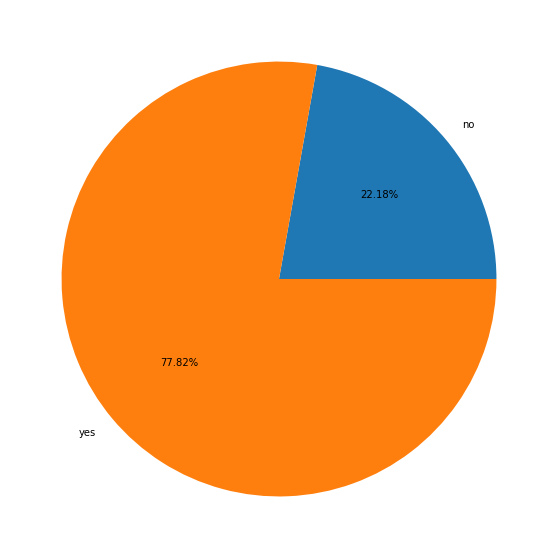

In [71]:
plt.figure(figsize=(15,10))
plt.pie(smoker_values[:5],labels=smoker_charges[:5],autopct='%1.2f%%')

# Total of 42000 USD has been collected from patients as insurance  out of that smokers paid around 33000 USD as insurance  , whereas non smokers paid 9200 USD as insurance 

In [72]:
df.groupby('smoker')['charges'].mean()

smoker
no      9218.346820
yes    32336.661853
Name: charges, dtype: float64

In [73]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


<AxesSubplot:xlabel='children', ylabel='count'>

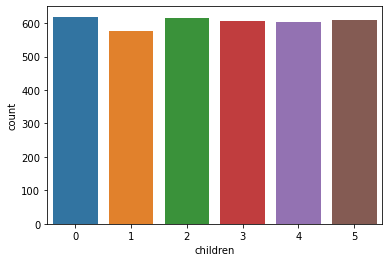

In [75]:
## Count plot
sns.countplot(x="children",data=df)



<AxesSubplot:xlabel='sex', ylabel='count'>

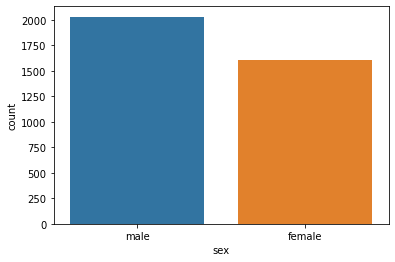

In [76]:
## Count plot
sns.countplot(x="sex",data=df)

# There are more males than females in our dataset

<AxesSubplot:ylabel='Frequency'>

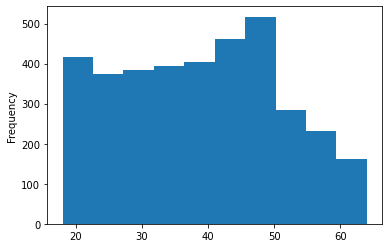

In [77]:
df['age'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

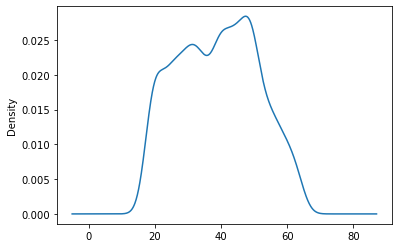

In [78]:
df['age'].plot(kind='kde')

# Age almost follows a normal distribution  whereas bmi follows a normal distribution

<AxesSubplot:ylabel='Density'>

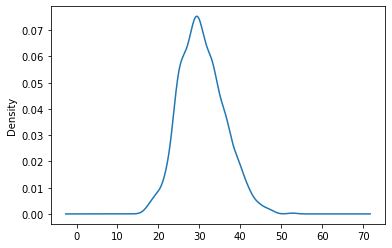

In [79]:
df['bmi'].plot(kind='kde')

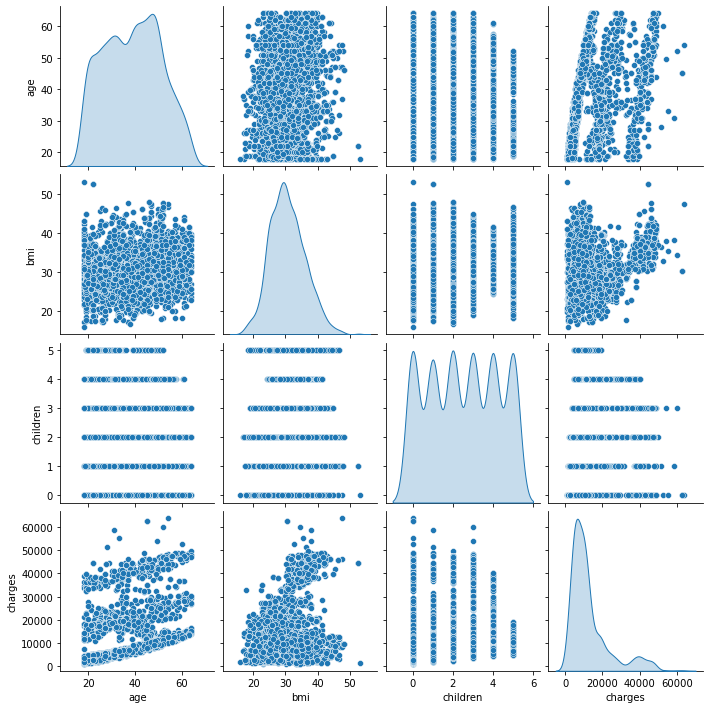

In [80]:
sns.pairplot(df, diag_kind = 'kde')

In [88]:
df.head()

,Unnamed: 0,age,sex,bmi,smoker,region,children,charges
0,0,21,male,25.745000,no,northeast,2,3279.868550
1,1,37,female,25.744165,yes,southeast,3,21454.494240
2,2,18,male,30.030000,no,southeast,1,1720.353700
3,3,37,male,30.676891,no,northeast,3,6801.437542
4,4,58,male,32.010000,no,southeast,1,11946.625900


In [84]:
df.to_csv('final_data.csv')

In [85]:
df= pd.read_csv('final_data.csv')

In [86]:
df.head()

,Unnamed: 0,age,sex,bmi,smoker,region,children,charges
0,0,21,male,25.745000,no,northeast,2,3279.868550
1,1,37,female,25.744165,yes,southeast,3,21454.494240
2,2,18,male,30.030000,no,southeast,1,1720.353700
3,3,37,male,30.676891,no,northeast,3,6801.437542
4,4,58,male,32.010000,no,southeast,1,11946.625900


<AxesSubplot:ylabel='age'>

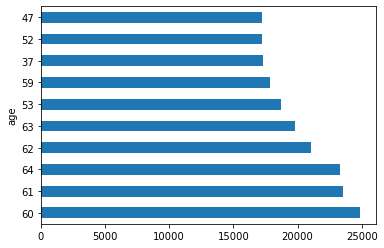

In [89]:
df.groupby('age')['charges'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh')

In [90]:
spend_age = df.groupby('age')['charges'].mean().sort_values(ascending = False).nlargest(10).index

In [91]:
spend_value =df.groupby('age')['charges'].mean().sort_values(ascending = False).nlargest(10).values

([<matplotlib.patches.Wedge at 0x7f0b54236470>,
 [Text(1.0180260572831574, 0.41668086912229296, '60'),
  Text(0.45401970425258853, 1.0019311893290839, '61'),
  Text(-0.33308182981642703, 1.0483589531482722, '64'),
  Text(-0.9263548015678945, 0.5931835985697068, '62'),
  Text(-1.0973895229665007, -0.07573793556307262, '63'),
  Text(-0.8614179741324836, -0.6840753422259042, '53'),
  Text(-0.35384731612973624, -1.0415335217206323, '59'),
  Text(0.2424504475760906, -1.0729481723131613, '37'),
  Text(0.7595950062211787, -0.7956226659188687, '52'),
  Text(1.060327773534775, -0.29275418471951353, '47')],
 [Text(0.5552869403362677, 0.22728047406670523, '12.37%'),
  Text(0.2476471114105028, 0.5465079214522275, '11.72%'),
  Text(-0.18168099808168747, 0.5718321562626938, '11.61%'),
  Text(-0.5052844372188515, 0.32355469012893096, '10.47%'),
  Text(-0.5985761034362731, -0.041311601216221426, '9.86%'),
  Text(-0.46986434952680917, -0.37313200485049314, '9.31%'),
  Text(-0.1930076269798561, -0.56810

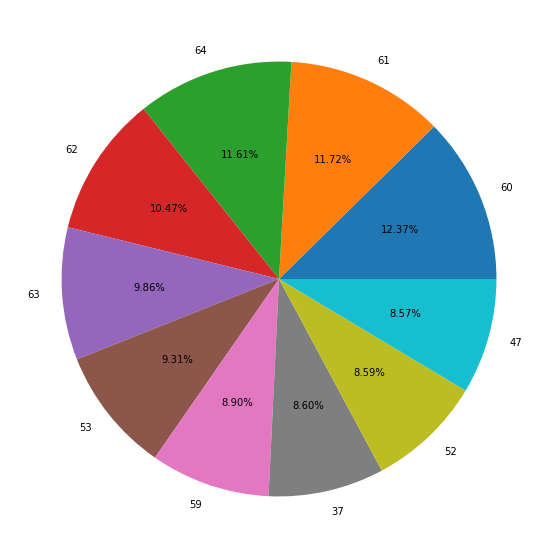

In [92]:
plt.figure(figsize=(15,10))
plt.pie(spend_value[:10],labels=spend_age[:10],autopct='%1.2f%%')

In [94]:
df.groupby('age')['charges'].mean()

age
18     5805.102844
19     8628.718897
20     7887.942672
21     9715.418062
22     9815.477682
23    11909.178972
24     9538.180433
25     7793.599404
26     7076.864830
27    10955.903782
28     8400.893461
29     9739.415391
30     9230.668723
31    10377.826608
32     8973.907156
33    11062.187690
34    15435.188804
35    12581.604128
36    14070.962699
37    17281.735715
38    11792.513847
39    11603.770002
40    10901.638905
41    10520.291525
42    14064.112179
43    16264.580638
44    14662.952824
45    13656.927297
46    13425.668359
47    17228.703963
48    12630.957618
49    13065.333159
50    13666.908767
51    15571.220666
52    17254.322086
53    18714.798931
54    16829.572032
55    15637.886673
56    17180.551294
57    16170.421481
58    16287.303831
59    17876.897223
60    24846.676838
61    23556.690719
62    21031.282892
63    19801.848080
64    23328.798159
Name: charges, dtype: float64

# People who are greater than 32 tend to pay more charges. Lets do some interesting patterns from this

In [95]:
df_less_32 = df[df['age']<=32]

In [96]:
df_great_32 =df[df['age']>32]

In [99]:
df_less_32.reset_index(drop=True)

,Unnamed: 0,age,sex,bmi,smoker,region,children,charges
0,0,21,male,25.745000,no,northeast,2,3279.868550
1,2,18,male,30.030000,no,southeast,1,1720.353700
2,6,25,male,31.192647,no,northeast,4,21736.328140
3,7,29,female,24.222614,no,northwest,2,4916.953065
4,8,27,male,25.065712,no,southwest,5,5515.809345
...,...,...,...,...,...,...,...,...
1234,3613,23,male,24.510000,no,northeast,0,2396.095900
1235,3614,22,male,28.310000,no,northwest,1,2639.042900
1236,3618,27,male,30.300000,no,southwest,3,4260.744000
1237,3622,31,male,28.278549,no,northeast,4,21806.181610


In [98]:
df_great_32

,Unnamed: 0,age,sex,bmi,smoker,region,children,charges
1,1,37,female,25.744165,yes,southeast,3,21454.494240
3,3,37,male,30.676891,no,northeast,3,6801.437542
4,4,58,male,32.010000,no,southeast,1,11946.625900
5,5,46,male,26.620000,no,southeast,1,7742.109800
9,9,47,female,27.302013,no,northwest,3,17009.334990
...,...,...,...,...,...,...,...,...
3625,3625,49,female,41.426984,no,northwest,4,10987.324960
3626,3626,39,female,26.202557,no,southeast,2,11735.844350
3627,3627,56,male,40.300000,no,southwest,0,10602.385000
3628,3628,48,female,34.930624,no,southeast,1,8976.140452


In [102]:
df_less_32.drop('Unnamed: 0',axis=1,inplace=True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
df_less_32

,age,sex,bmi,smoker,region,children,charges
0,21,male,25.745000,no,northeast,2,3279.868550
2,18,male,30.030000,no,southeast,1,1720.353700
6,25,male,31.192647,no,northeast,4,21736.328140
7,29,female,24.222614,no,northwest,2,4916.953065
8,27,male,25.065712,no,southwest,5,5515.809345
...,...,...,...,...,...,...,...
3613,23,male,24.510000,no,northeast,0,2396.095900
3614,22,male,28.310000,no,northwest,1,2639.042900
3618,27,male,30.300000,no,southwest,3,4260.744000
3622,31,male,28.278549,no,northeast,4,21806.181610


In [104]:
df_great_32.drop('Unnamed: 0',axis=1,inplace=True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
df_great_32

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.494240
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900
5,46,male,26.620000,no,southeast,1,7742.109800
9,47,female,27.302013,no,northwest,3,17009.334990
...,...,...,...,...,...,...,...
3625,49,female,41.426984,no,northwest,4,10987.324960
3626,39,female,26.202557,no,southeast,2,11735.844350
3627,56,male,40.300000,no,southwest,0,10602.385000
3628,48,female,34.930624,no,southeast,1,8976.140452


<AxesSubplot:>

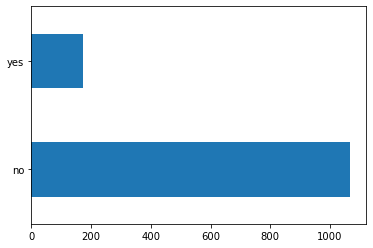

In [106]:
df_less_32['smoker'].value_counts().plot(kind='barh')

# Most people less than 32 dont smoke

<AxesSubplot:>

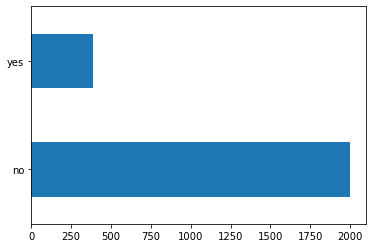

In [107]:
df_great_32['smoker'].value_counts().plot(kind='barh')

# Most people greater than 32 also dont smoke but smoke more than people lesser than 32 category

In [110]:
df_great_32.head()

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.494240
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900
5,46,male,26.620000,no,southeast,1,7742.109800
9,47,female,27.302013,no,northwest,3,17009.334990


In [111]:
df_great_32.groupby('sex')['bmi'].mean()

sex
female    31.169178
male      30.863011
Name: bmi, dtype: float64

In [112]:
df_great_32['bmi'].mean()

31.011548825872023

In [113]:
df_less_32['bmi'].mean()

29.89267566607748

<AxesSubplot:xlabel='smoker', ylabel='count'>

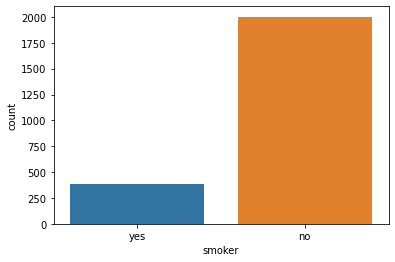

In [114]:
sns.countplot(x="smoker",data=df_great_32)

<AxesSubplot:xlabel='sex', ylabel='count'>

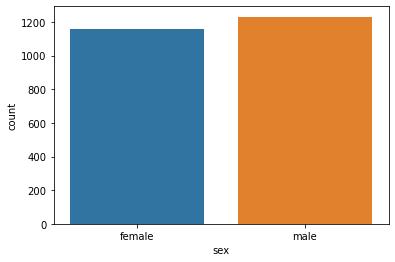

In [115]:
sns.countplot(x="sex",data=df_great_32)

<AxesSubplot:xlabel='sex', ylabel='count'>

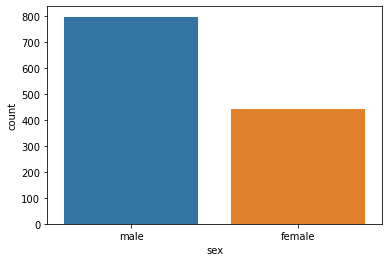

In [116]:
sns.countplot(x="sex",data=df_less_32)

# There are more males in both categories

<AxesSubplot:ylabel='Frequency'>

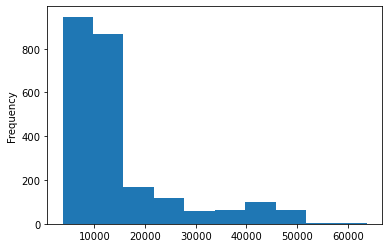

In [117]:
df_great_32['charges'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

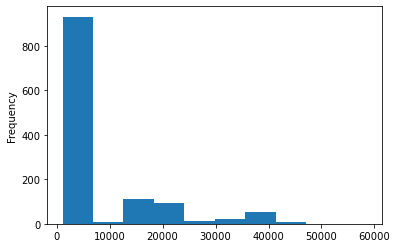

In [118]:
df_less_32['charges'].plot(kind='hist')

In [119]:
df_great_32['charges'].mean()

14734.518690209117

In [120]:
df_less_32['charges'].mean()

9022.293129711057

# from the above histogram it is very clear that people who are above 32 are charged more  on insurance

# Is it because of age related ailment or is there any factor that is attributing to this. Now lets dig deeper by splitting the dataframe of people who are above 32 into parts

In [121]:
df_great_32.head()

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.494240
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900
5,46,male,26.620000,no,southeast,1,7742.109800
9,47,female,27.302013,no,northwest,3,17009.334990


<AxesSubplot:ylabel='Frequency'>

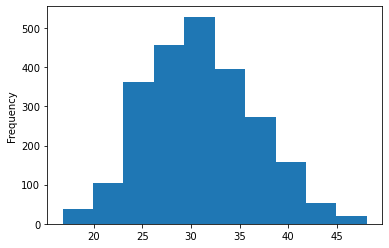

In [123]:
df_great_32['bmi'].plot(kind='hist')

In [132]:
smoker_sexwise = df_great_32.groupby('sex')['smoker'].value_counts().index

In [133]:
smoker_sexwisevalues= df_great_32.groupby('sex')['smoker'].value_counts().values

([<matplotlib.patches.Wedge at 0x7f0b53d57cf8>,
 [Text(0.2330834808730229, 1.0750219025415786, "('female', 'no')"),
  Text(-1.0629845929343629, 0.28295539433657585, "('female', 'yes')"),
  Text(-0.4191149357000182, -1.0170263864193347, "('male', 'no')"),
  Text(1.035462467398904, -0.37123776560066457, "('male', 'yes')")],
 [Text(0.12713644411255792, 0.5863755832044973, '43.20%'),
  Text(-0.5798097779641979, 0.15433930600176862, '5.31%'),
  Text(-0.22860814674546442, -0.554741665319637, '40.53%'),
  Text(0.5647977094903112, -0.20249332669127157, '10.96%')])

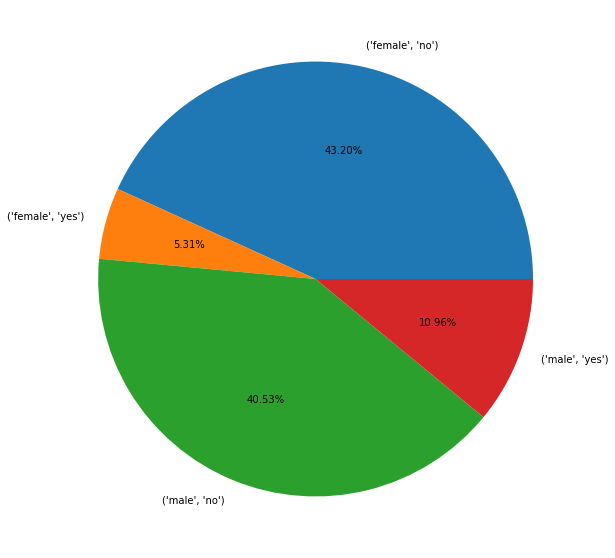

In [134]:
plt.figure(figsize=(15,10))
plt.pie(smoker_sexwisevalues[:10],labels=smoker_sexwise[:10],autopct='%1.2f%%')

# Do people who dont smoke get charged in insurance less than those who do ? Lets concentrate only on people who are over 32

In [135]:
df= df_great_32.copy()

In [137]:
df.head()

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.494240
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900
5,46,male,26.620000,no,southeast,1,7742.109800
9,47,female,27.302013,no,northwest,3,17009.334990


In [138]:
df_smoke = df[df['smoker']=='yes']

In [139]:
df_nosmoke = df[df['smoker']=='no']

In [143]:
df_smoke.reset_index(drop=True)

,age,sex,bmi,smoker,region,children,charges
0,37,female,25.744165,yes,southeast,3,21454.49424
1,36,male,33.577128,yes,southwest,2,38433.52430
2,47,male,33.554859,yes,northeast,1,41501.65555
3,47,male,36.080000,yes,southeast,1,42211.13820
4,63,female,32.200000,yes,southwest,2,47305.30500
...,...,...,...,...,...,...,...
384,37,female,21.411056,yes,northeast,2,18137.97248
385,43,male,27.800000,yes,southwest,0,37829.72420
386,35,female,34.105000,yes,northwest,3,39983.42595
387,53,male,37.059947,yes,northwest,3,46412.53324


In [142]:
df_nosmoke.reset_index(drop=True)

,age,sex,bmi,smoker,region,children,charges
0,37,male,30.676891,no,northeast,3,6801.437542
1,58,male,32.010000,no,southeast,1,11946.625900
2,46,male,26.620000,no,southeast,1,7742.109800
3,47,female,27.302013,no,northwest,3,17009.334990
4,45,female,26.917411,no,northeast,2,8549.137155
...,...,...,...,...,...,...,...
1997,49,female,41.426984,no,northwest,4,10987.324960
1998,39,female,26.202557,no,southeast,2,11735.844350
1999,56,male,40.300000,no,southwest,0,10602.385000
2000,48,female,34.930624,no,southeast,1,8976.140452


<AxesSubplot:ylabel='Frequency'>

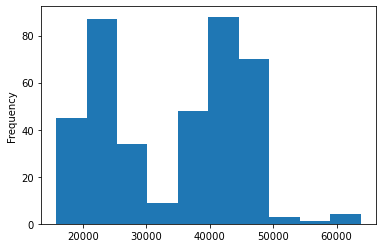

In [145]:
df_smoke['charges'].plot(kind='hist')

In [146]:
pip install ptitprince

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 51 kB 775 kB/s             
  Created wheel for ptitprince: filename=ptitprince-0.2.5-py3-none-any.whl size=8426 sha256=c4ecb06489f706edd9c6b65052c9f7ba5b016bf2e34ece53ec6ddff595f31b67
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/4b/06/45100088fa3d1f864ac8798b3627bee241184a7a58228dbf7c
Successfully built ptitprince
Note: you may need to restart the kernel to use updated packages.


In [148]:
import ptitprince

<AxesSubplot:xlabel='charges', ylabel='region'>

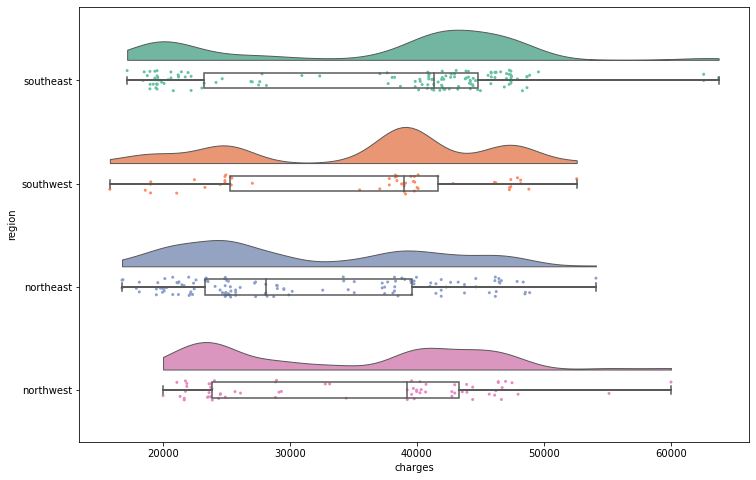

In [151]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df_smoke, x = 'region', y = 'charges', orient = 'h')

# Smokers coming from southeast paid more insurance than people from other regions

<AxesSubplot:xlabel='charges', ylabel='region'>

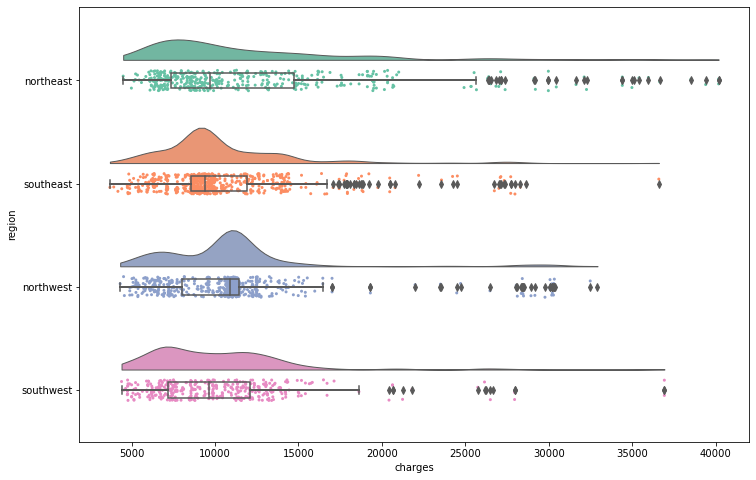

In [152]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df_nosmoke, x = 'region', y = 'charges', orient = 'h')

# Non Smokers coming from northwest paid insurance more than people from other regions

In [153]:
df.head()

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.494240
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900
5,46,male,26.620000,no,southeast,1,7742.109800
9,47,female,27.302013,no,northwest,3,17009.334990


<AxesSubplot:xlabel='charges', ylabel='sex'>

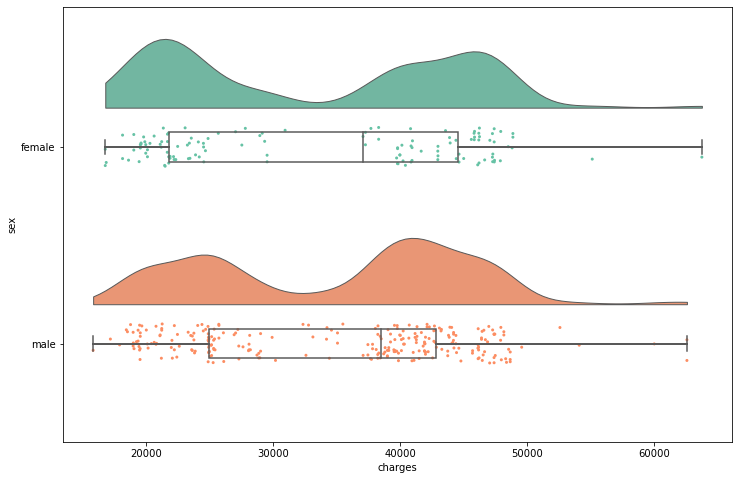

In [154]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df_smoke, x = 'sex', y = 'charges', orient = 'h')

# Male smokers paid more insurance than female

<AxesSubplot:xlabel='charges', ylabel='sex'>

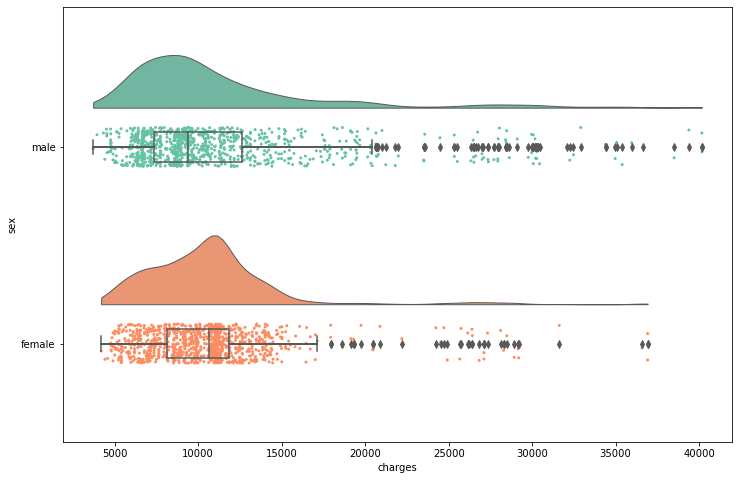

In [155]:
plt.figure(figsize = (12,8))
ptitprince.RainCloud(data = df_nosmoke, x = 'sex', y = 'charges', orient = 'h')

# Female non smokers paid more insurance than male non smokers

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


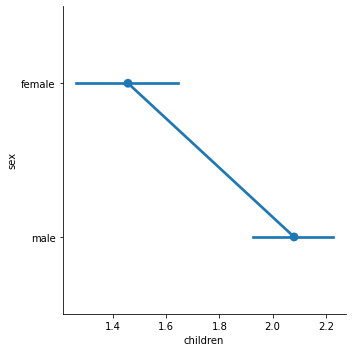

In [162]:
sns.factorplot('children','sex',data=df_smoke)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


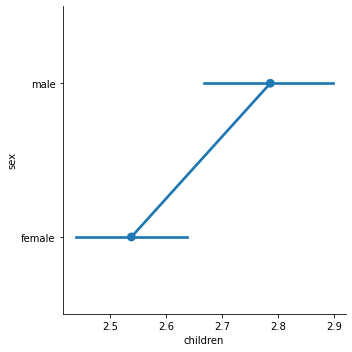

In [165]:
sns.factorplot('children','sex',data=df_nosmoke)
plt.show()

# Male tend to have more children in both smokers and non smokers category

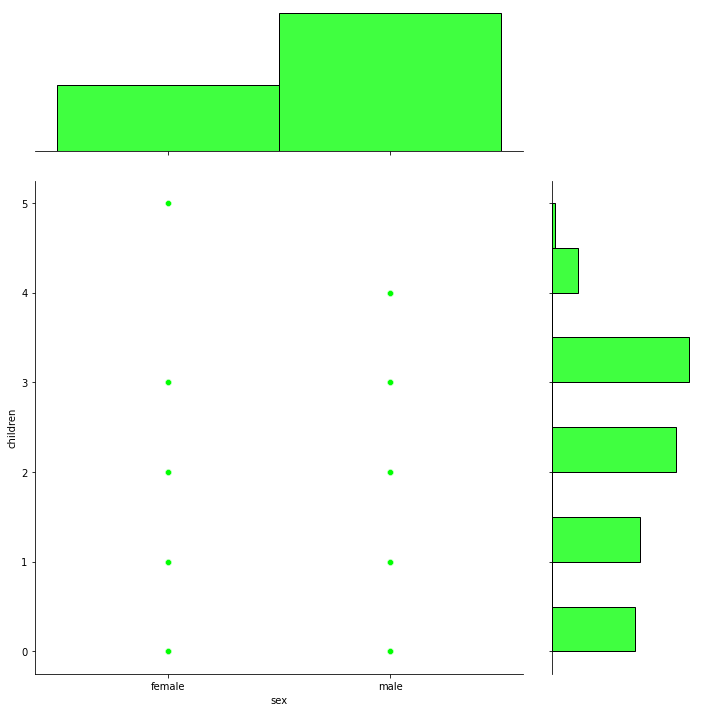

In [168]:
sns.jointplot(x="sex", y="children",  data=df_smoke, height=10, ratio=3, color="lime")
plt.show()



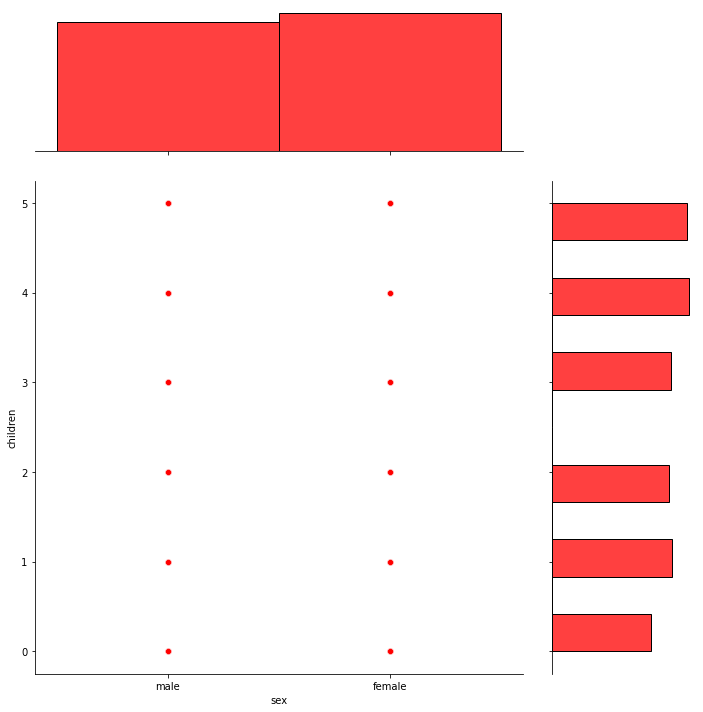

In [170]:
sns.jointplot(x="sex", y="children",  data=df_nosmoke, height=10, ratio=3, color="red")
plt.show()

# Most smokers have 3 or less children, while most non smokers have more than 3 

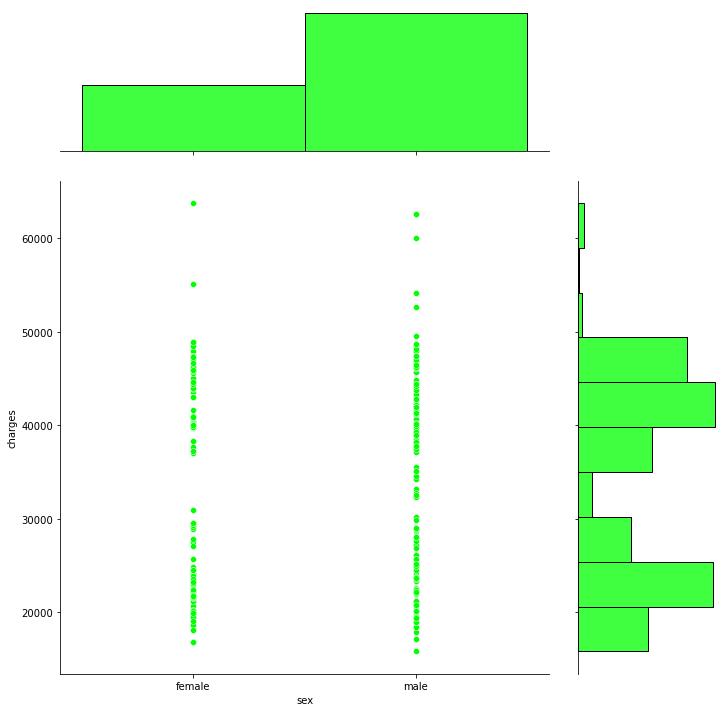

In [173]:
sns.jointplot(x="sex", y="charges",  data=df_smoke, height=10, ratio=3, color="lime")
plt.show()


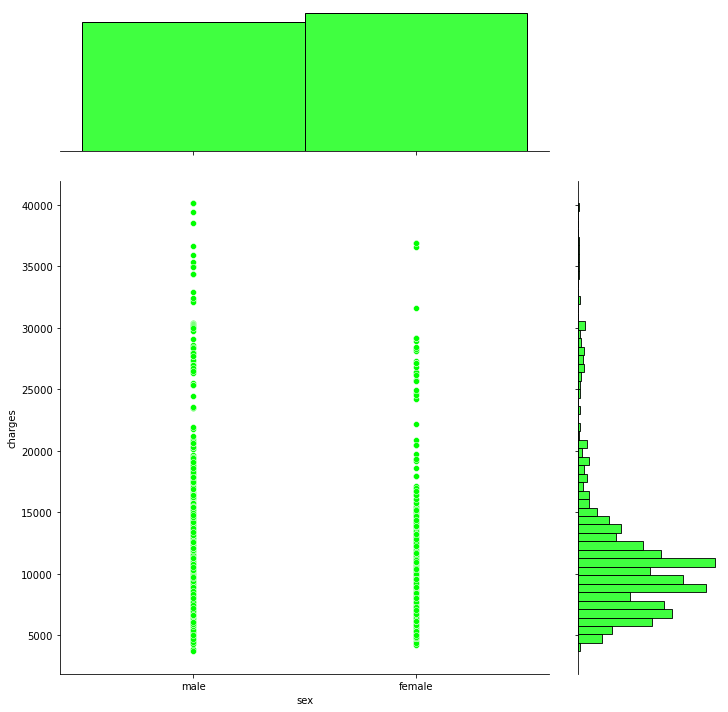

In [174]:
sns.jointplot(x="sex", y="charges",  data=df_nosmoke, height=10, ratio=3, color="lime")
plt.show()


# From the above joinplot it is very clear that smoking is what causes people to pay more  insurance

In [181]:
df_smoke['charges'].mean()

34482.08483087404

In [182]:
df_nosmoke['charges'].mean()

10897.4541403996

<AxesSubplot:ylabel='Frequency'>

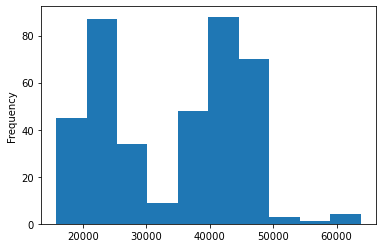

In [183]:
df_smoke['charges'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

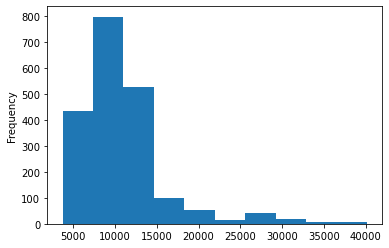

In [184]:
df_nosmoke['charges'].plot(kind='hist')

# The histograms corroborate the same as well

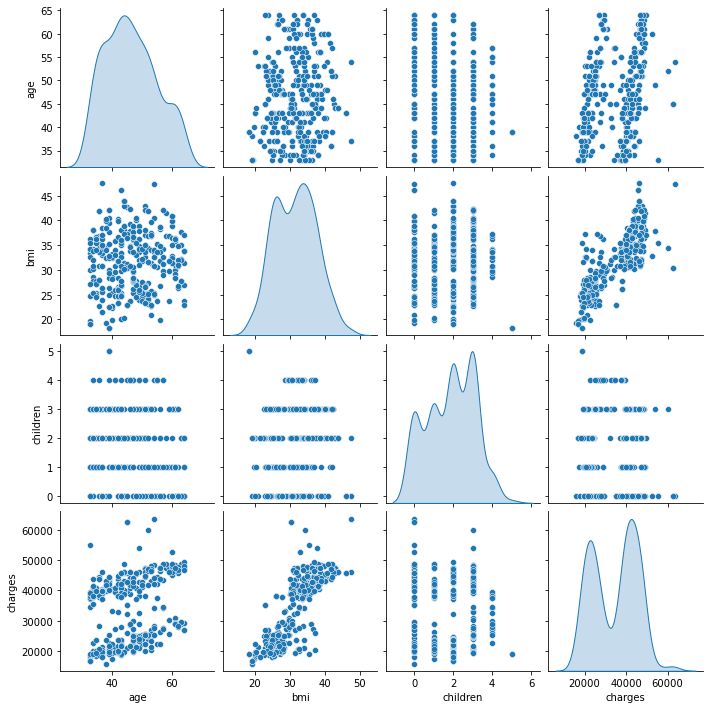

In [185]:
sns.pairplot(df_smoke, diag_kind = 'kde')

In [186]:
df_smoke.head()

,age,sex,bmi,smoker,region,children,charges
1,37,female,25.744165,yes,southeast,3,21454.49424
10,36,male,33.577128,yes,southwest,2,38433.52430
15,47,male,33.554859,yes,northeast,1,41501.65555
17,47,male,36.080000,yes,southeast,1,42211.13820
24,63,female,32.200000,yes,southwest,2,47305.30500


# Now that smokers are more susceptible to health related ailments , the insurance company  has decided to run a campaign on its insurance plans ! It has decided to run a  campaign in the region which has more smokers .

# Which region has more smokers?

<AxesSubplot:>

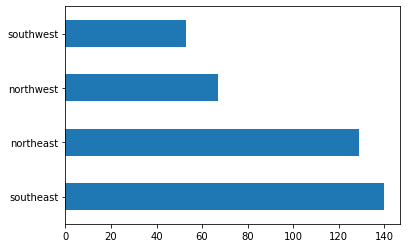

In [188]:
df_smoke['region'].value_counts().plot(kind='barh')

# Most smokers come from southeast and northeast regions so the insurance company should target more in these regions

In [191]:
smokers_region =df_smoke.groupby('region')['charges'].mean().index

In [192]:
smokers_region_values =df_smoke.groupby('region')['charges'].mean().values

([<matplotlib.patches.Wedge at 0x7f0b52876be0>,
 [Text(0.8361493608722126, 0.7147406846633194, 'northeast'),
  Text(-0.6467543243292653, 0.8897802222804212, 'northwest'),
  Text(-0.8553529182873366, -0.6916439728482688, 'southeast'),
  Text(0.7567831812190975, -0.7982976992475318, 'southwest')],
 [Text(0.45608146956666135, 0.38985855527090146, '22.51%'),
  Text(-0.352775085997781, 0.4853346666984115, '24.98%'),
  Text(-0.4665561372476381, -0.3772603488263284, '26.66%'),
  Text(0.4127908261195077, -0.43543510868047186, '25.85%')])

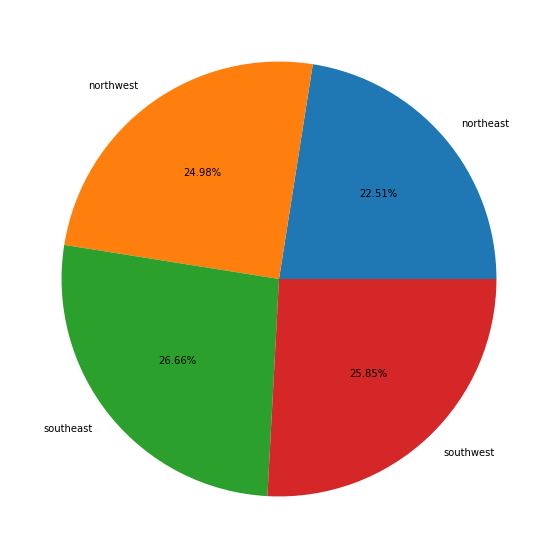

In [193]:
plt.figure(figsize=(15,10))
plt.pie(smokers_region_values[:10],labels=smokers_region[:10],autopct='%1.2f%%')

In [194]:
bmi_region =df_smoke.groupby('region')['bmi'].mean().index

In [195]:
bmi_region_values =df_smoke.groupby('region')['bmi'].mean().values

([<matplotlib.patches.Wedge at 0x7f0b5257fd68>,
 [Text(0.8169061830907369, 0.7366575106710875, 'northeast'),
  Text(-0.6880791070204098, 0.8582232474607033, 'northwest'),
  Text(-0.8203205465685218, -0.7328534648055652, 'southeast'),
  Text(0.7791601651055081, -0.7764724316501891, 'southwest')],
 [Text(0.44558519077676556, 0.401813187638775, '23.36%'),
  Text(-0.3753158765565871, 0.4681217713422018, '24.80%'),
  Text(-0.44744757085555736, -0.3997382535303083, '26.90%'),
  Text(0.4249964536939135, -0.42353041726373947, '24.95%')])

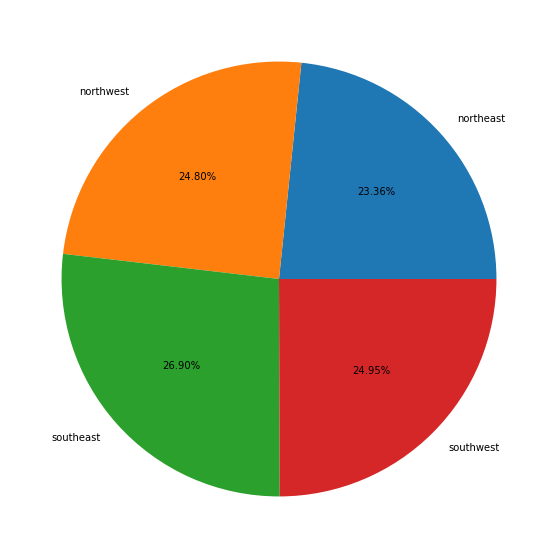

In [196]:
plt.figure(figsize=(15,10))
plt.pie(bmi_region_values[:10],labels=bmi_region[:10],autopct='%1.2f%%')

# Smokers from southeast are more susceptible to getting diseases and end up getting paid more in insurance

# ------------------------------------------------------------------

# Feature Engineering

# Outlier analysis

In [197]:
df_final=pd.read_csv('final_data.csv')

In [198]:
df= df_final.copy()

In [201]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [202]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21,male,25.745000,no,northeast,2,3279.868550
1,37,female,25.744165,yes,southeast,3,21454.494240
2,18,male,30.030000,no,southeast,1,1720.353700
3,37,male,30.676891,no,northeast,3,6801.437542
4,58,male,32.010000,no,southeast,1,11946.625900


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

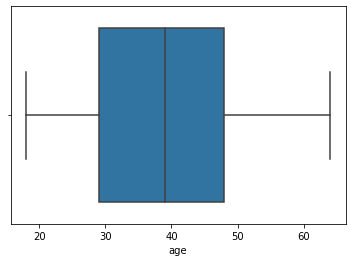

In [203]:
sns.boxplot(df['age'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

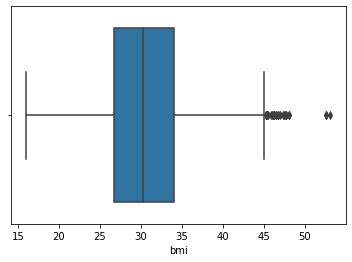

In [204]:
sns.boxplot(df['bmi'])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   int64  
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 198.6+ KB


In [214]:
np.percentile(df['bmi'], 95, axis=0)

40.15

In [215]:
df['bmi']=np.where(df['bmi']>40.15,40.15,df['bmi'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

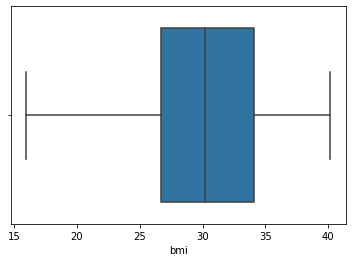

In [216]:
sns.boxplot(df['bmi'])

# There were some outliers in bmi column we replace them with 95th percentile

In [217]:
df['children'] =df['children'].apply(str)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   int64  
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   object 
 6   charges   3630 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 198.6+ KB


# One hot encoding categorical columns 

In [219]:
df['sex'].value_counts()

male      2029
female    1601
Name: sex, dtype: int64

In [220]:
df['sex']= np.where(df['sex']=='male',0,1)

In [221]:
df['sex'].value_counts()

0    2029
1    1601
Name: sex, dtype: int64

In [222]:
df['smoker'].value_counts()

no     3070
yes     560
Name: smoker, dtype: int64

In [223]:
df['smoker']= np.where(df['smoker']=='no',0,1)

In [224]:
df['smoker'].value_counts()

0    3070
1     560
Name: smoker, dtype: int64

In [225]:
df['children'].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

In [226]:
df['children'] =pd.get_dummies(df['children'],drop_first=True)

In [228]:
df_copy = df.copy()

In [232]:
regions = pd.get_dummies(df['region'],drop_first=True)

In [233]:
df = pd.concat([df,regions],axis=1)

In [234]:
df.head()

,age,sex,bmi,smoker,region,children,charges,northwest,southeast,southwest
0,21,0,25.745000,0,northeast,0,3279.868550,0,0,0
1,37,1,25.744165,1,southeast,0,21454.494240,0,1,0
2,18,0,30.030000,0,southeast,1,1720.353700,0,1,0
3,37,0,30.676891,0,northeast,0,6801.437542,0,0,0
4,58,0,32.010000,0,southeast,1,11946.625900,0,1,0


In [235]:
df.drop('region',axis=1,inplace=True)

In [236]:
df.head()

,age,sex,bmi,smoker,children,charges,northwest,southeast,southwest
0,21,0,25.745000,0,0,3279.868550,0,0,0
1,37,1,25.744165,1,0,21454.494240,0,1,0
2,18,0,30.030000,0,1,1720.353700,0,1,0
3,37,0,30.676891,0,0,6801.437542,0,0,0
4,58,0,32.010000,0,1,11946.625900,0,1,0


# Feature Selection and Model Building

In [240]:
from sklearn.feature_selection import mutual_info_regression

In [241]:
X= df.drop('charges',axis=1)

In [242]:
y = df['charges']

In [244]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [245]:
print(selection.feature_importances_)


[0.12170077 0.01258294 0.21362055 0.60456491 0.01072234 0.01405627
 0.01386438 0.00888783]


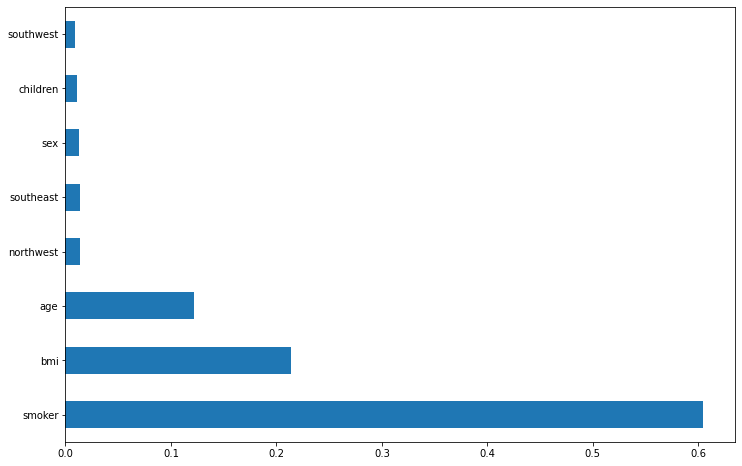

In [246]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# The ML Model says that smoker column is the most important feature that should be included in order to predict charges of insurance

# Train test split

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling 

# Standardizing data as most ML algorithms except random forest expects numerical columns to be normalized

In [248]:

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2904, 8)

(2904,)

(726, 8)

(726,)

# Random Forest

In [249]:


from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [250]:
y_pred = reg_rf.predict(X_test)

In [251]:
reg_rf.score(X_train, y_train)

0.980891828296891

In [252]:
reg_rf.score(X_test, y_test)

0.8486447121509112

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


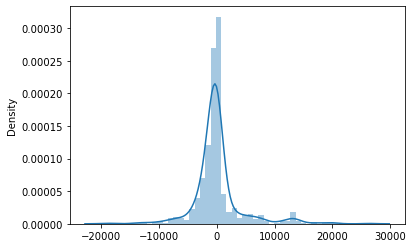

In [253]:

sns.distplot(y_test-y_pred)
plt.show()


# The ytest- ypred follows a normal distribution which means our random forest model predicted y-test well

In [254]:
from sklearn import metrics

In [256]:


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2230.6053553330275
MSE: 17438191.548488908
RMSE: 4175.906075151704


In [257]:

# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))


0.033369499579022285

In [258]:
metrics.r2_score(y_test, y_pred)

0.8486447121509112

# The Rsquare value of random forest algorithm is 85%. which is good 

# XG Boost Algorithm

In [261]:
pip install xgboost

     |████████████████████████████████| 173.6 MB 9.6 kB/s             
Note: you may need to restart the kernel to use updated packages.


In [262]:
from xgboost import XGBRegressor

In [263]:
model_xg = XGBRegressor()

In [265]:
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [266]:
y_pred_xg = model_xg.predict(X_test)

In [267]:
model_xg.score(X_train, y_train)

0.9786365163675337

In [268]:
model_xg.score(X_test, y_test)

0.8233412201478649

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


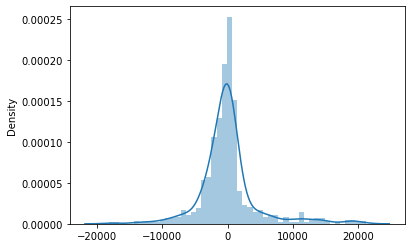

In [269]:
sns.distplot(y_test-y_pred_xg)
plt.show()

In [270]:
metrics.r2_score(y_test, y_pred_xg)

0.8233412201478649

# The r2 value of Xg boost is 82% which is lesser than that of random forest 

# Random Forest algorithm performed well in predicting y_test 